## Kodowanie zdań

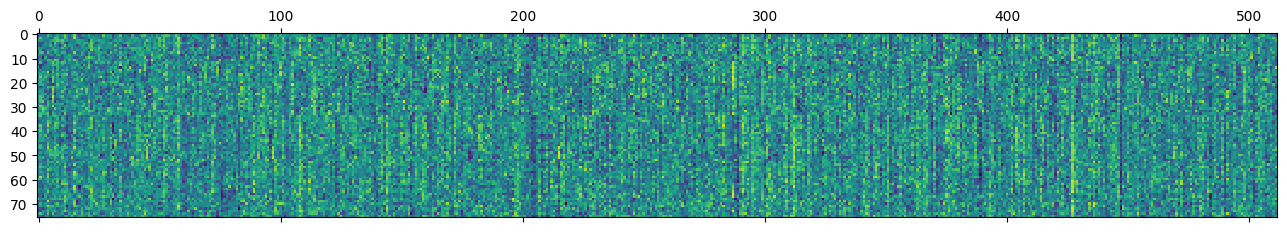

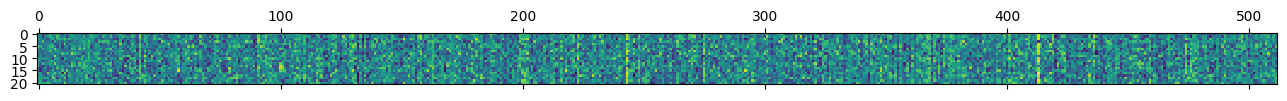

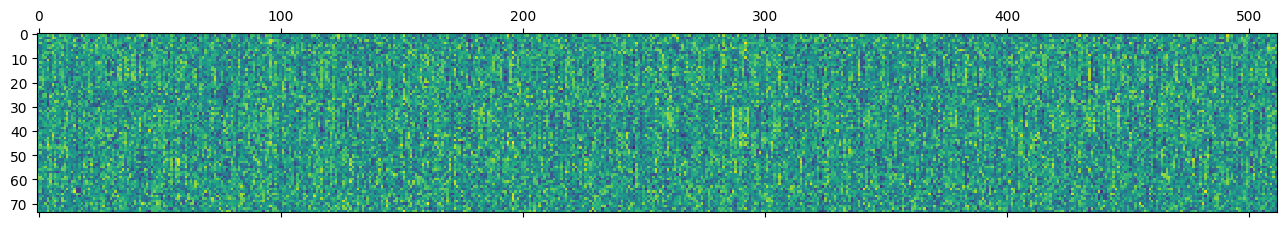

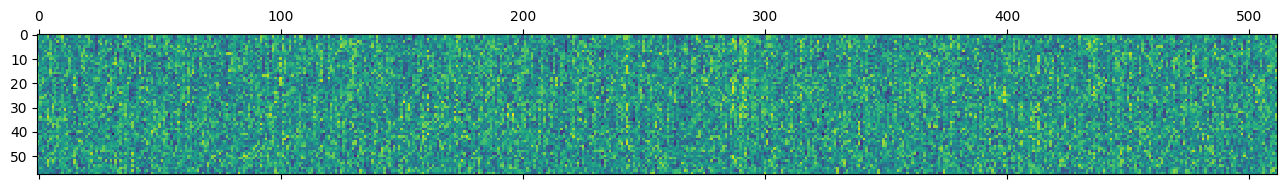

In [7]:
import numpy as np
from datasets import EmbeddedDataset
from algorithms import segments
import matplotlib.pyplot as plt
with EmbeddedDataset('wiki_segments.npz') as ds:
    Embs = ds[ds.get_embeddings()[-3:-1]]
for i in range(len(Embs)):
    plt.matshow(Embs[i])

with EmbeddedDataset('choi_segments.npz') as ds:
    Embs = ds[ds.get_embeddings()[-3:-1]]
for i in range(len(Embs)):
    plt.matshow(Embs[i])


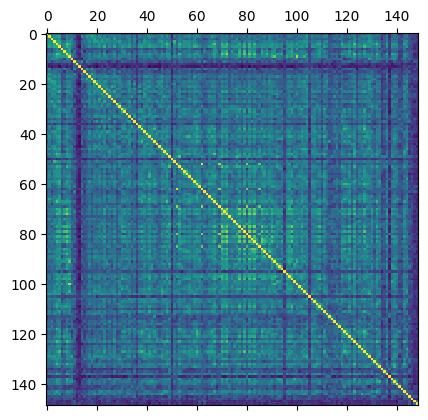

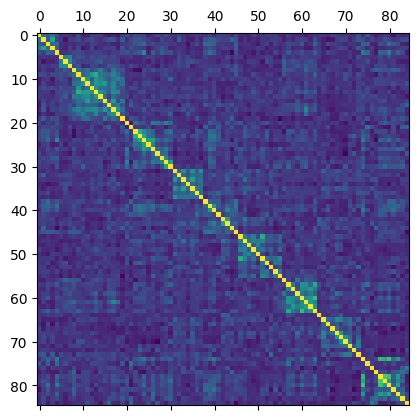

In [10]:
with EmbeddedDataset('wiki_segments.npz') as ds:
    wemb = ds[ds.get_embeddings()[-1]]
with EmbeddedDataset('choi_segments.npz') as ds:
    cemb = ds[ds.get_embeddings()[-1]]
wemb_mat = np.inner(wemb,wemb)
cemb_mat = np.inner(cemb,cemb)
plt.matshow(wemb_mat)
plt.matshow(cemb_mat)